In [19]:
"""
Exercise 1 - preprocessing. Removing the unnecessary columns and saving them for later plus loading dataframe
"""
import pandas as pd

baseDf = pd.read_csv('USCensus1990.data.csv')
externalVariablesArr = [baseDf.pop('dAge'), baseDf.pop('dHispanic'), baseDf.pop('iYearwrk'), baseDf.pop('iSex')]
baseDf.pop('caseid')

0            10000
1            10001
2            10002
3            10003
4            10004
            ...   
2458280    2468280
2458281    2468281
2458282    2468282
2458283    2468283
2458284    2468284
Name: caseid, Length: 2458285, dtype: int64

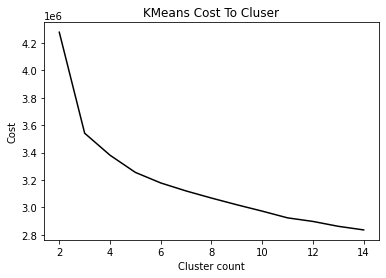

In [43]:
"""
Exercise 2 - Clustering the remaining columns and finding out which clustering method is king.
Before that, because data is categorial, we will use one hot encoding to make it continual.
For this exercise we will use gmm, kmeans, dbscan.
Because the database is massive, I'm unavailable often, and I have very little processing power, I've choosen to only use those 3 and calculate everything using a sample.
To determine which clustering dimension is best, we will use silleuhet score and david to determine the davies_bouldin_score.
Then we will compare the algorithms
"""
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn import datasets
import dunnsklearn
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder  
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeansSilhouetteArr = []
kmeansDaviesBouldinArr = []
lossesArr = []
size = 24000
for i in range(0, 10):
    encoder = OneHotEncoder()
    testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
    silhouetteArr = []
    daviesBouldinArr = []
    lossArr = []
    for j in range(2, 15):
        kmeans = KMeans(n_clusters=j)
        kmeans.fit(testDf)
        labels = kmeans.labels_
        lossArr.append(kmeans.inertia_)
        daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
        silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    lossesArr.append(lossArr)
    kmeansSilhouetteArr.append(silhouetteArr)
    kmeansDaviesBouldinArr.append(daviesBouldinArr)

indexArr = [2,3,4,5,6,7,8,9,10,11,12,13,14]
averagedKmeansSilhouetteArr = []
averagedKmeansDaviesBouldinArr = []
for i in range(0, 13):
    averageScore = 0
    for j in range(0, 9):
        averageScore += kmeansSilhouetteArr[j][i]
    averagedKmeansSilhouetteArr.append(averageScore)
for i in range(0, 13):
    averageScore = 0
    for j in range(0, 9):
        averageScore += kmeansDaviesBouldinArr[j][i]
    averagedKmeansDaviesBouldinArr.append(averageScore)
fig, ax = plt.subplots()
plt.title("Silhouette Score Average KMeans")
plt.xlabel("Cluster count")
plt.ylabel("Score")
ax.plot(indexArr, averagedKmeansSilhouetteArr, color = "black", label="Silhouette Values")
plt.savefig('Silhouette Score Average KMeans.svg', format='svg', dpi=1200)
fig, ax = plt.subplots()
plt.title("DaviesBouldin Score Average KMeans")
plt.xlabel("Cluster count")
plt.ylabel("Score")
ax.plot(indexArr, averagedKmeansDaviesBouldinArr, color = "black", label="DaviesBouldin Values")
plt.savefig('DaviesBouldin Score Average KMeans.svg', format='svg', dpi=1200)

averageLoss=[]
for i in range(0, 13):
    averageScore = 0
    for j in range(0, 9):
        averageScore += lossesArr[j][i]
    averageLoss.append(averageScore)
fig, ax = plt.subplots()
plt.title("KMeans Cost To Cluser")
plt.xlabel("Cluster count")
plt.ylabel("Cost")
ax.plot(indexArr, averageLoss, color = "black", label="DaviesBouldin Values")
plt.savefig('KMeans Cost To Cluster.svg', format='svg', dpi=1200)

In [ ]:
"""
Part 2 - comparing algorithms.
We will take each algorithm with the given parameters we found and compare sillhouette scores between their clustering.
"""
encoder = OneHotEncoder()
testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
silhouetteArr = []
daviesBouldinArr = []
for j in range(0, 1):
    dbscan = DBSCAN(eps = 4, min_samples = 128)
    dbscan.fit(testDf)
    labels = dbscan.labels_
    daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
    silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(testDf)
    labels = kmeans.labels_
    daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
    silhouetteArr.append(metrics.silhouette_score(testDf, labels))

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mutual_info_score
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn import datasets
import dunnsklearn
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder  
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
size = 24000
fullDf = pd.read_csv('USCensus1990.data.csv')
encoder = OneHotEncoder()
kmeanss = []
for i in range(0, 10):
    print("Starting")
    samples = fullDf.sample(size)
    testDf = encoder.fit_transform(samples).toarray()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(testDf)
    labels = kmeans.labels_
    kmeanss.append([mutual_info_score(samples['iYearwrk'].values, labels),mutual_info_score(samples['dAge'].values, labels),mutual_info_score(samples['iSex'].values, labels),mutual_info_score(samples['dHispanic'].values, labels)])
gmms = []
for i in range(0, 10):
    print("STARTING")
    samples = fullDf.sample(size)
    testDf = encoder.fit_transform(samples).toarray()
    gmm = GaussianMixture(n_components=3)
    gmm.fit(testDf)
    labels = gmm.predict(testDf)
    gmms.append([mutual_info_score(samples['iYearwrk'].values, labels),mutual_info_score(samples['dAge'].values, labels),mutual_info_score(samples['iSex'].values, labels),mutual_info_score(samples['dHispanic'].values, labels)])
dbscans = []
for i in range(0, 10):
    print("STARTING")
    samples = fullDf.sample(size)
    testDf = encoder.fit_transform(samples).toarray()
    dbscan = DBSCAN(eps = 4, min_samples = 128)
    dbscan.fit(testDf)
    labels = dbscan.labels_
    dbscans.append([mutual_info_score(samples['iYearwrk'].values, labels),mutual_info_score(samples['dAge'].values, labels),mutual_info_score(samples['iSex'].values, labels),mutual_info_score(samples['dHispanic'].values, labels)])
kavg0=0
kavg1=0
kavg2=0
kavg3=0
for i in kmeanss:
    kavg0+=i[0]/len(kmeanss)
    kavg1+=i[1]/len(kmeanss)
    kavg2+=i[2]/len(kmeanss)
    kavg3+=i[3]/len(kmeanss)
gavg0=0
gavg1=0
gavg2=0
gavg3=0
for i in gmms:
    gavg0+=i[0]/len(gmms)
    gavg1+=i[1]/len(gmms)
    gavg2+=i[2]/len(gmms)
    gavg3+=i[3]/len(gmms)
davg0=0
davg1=0
davg2=0
davg3=0
for i in dbscans:
    davg0+=i[0]/len(dbscans)
    davg1+=i[1]/len(dbscans)
    davg2+=i[2]/len(dbscans)
    davg3+=i[3]/len(dbscans)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar(arr, [kavg0, gavg0, davg0], width = 0.3)
plt.title("iYearwrk Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('iYearwrk Association To Clusters.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar(arr, [kavg1, gavg1, davg1], width = 0.3)
plt.title("dAge Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('dAge Association To Clusters.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar(arr, [kavg2, gavg2, davg2], width = 0.3)
plt.title("iSex Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('iSex Association To Clusters.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar( arr, [kavg3, gavg3, davg3],width = 0.3)
plt.title("dHispanic Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('dHispanic Association To Clusters.svg', format='svg', dpi=1200)

KeyboardInterrupt: 

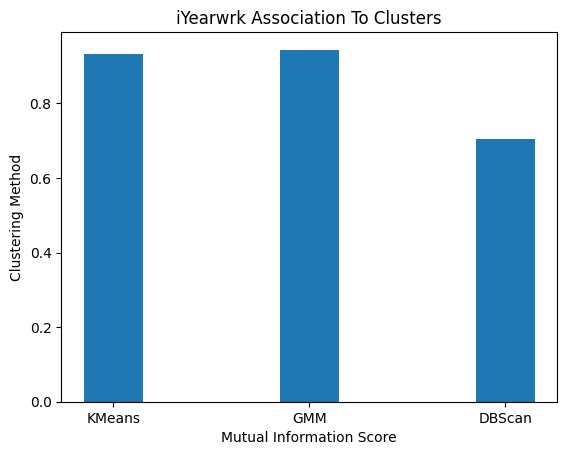

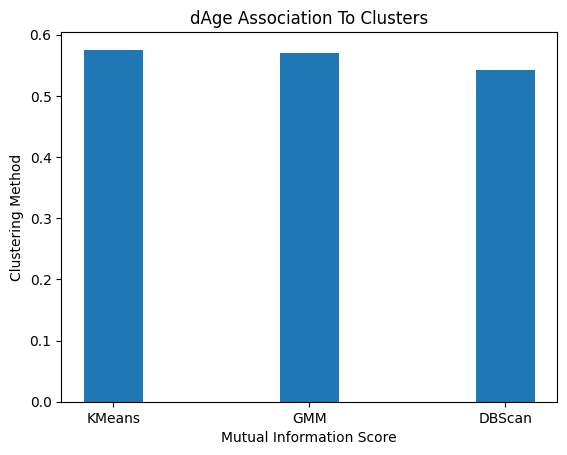

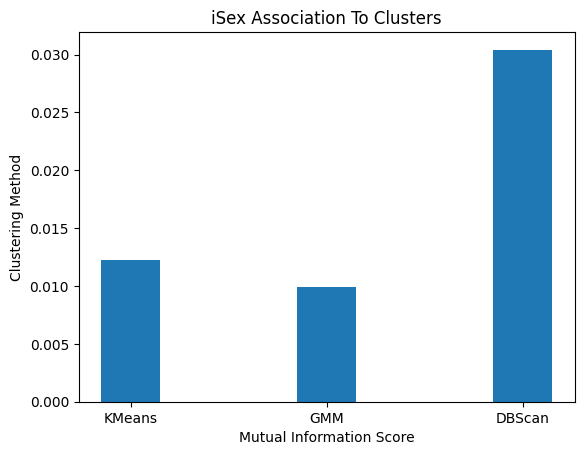

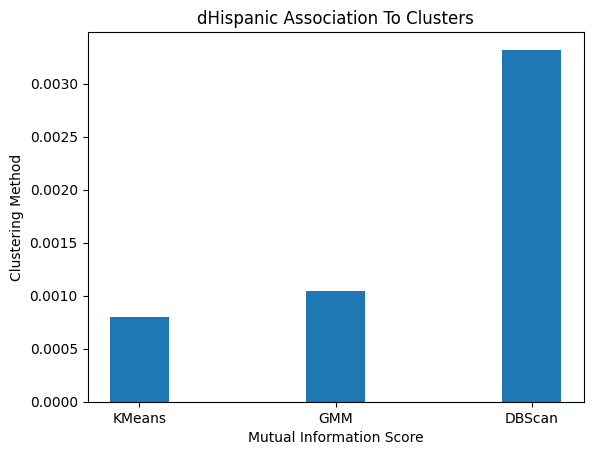

In [17]:
kavg0=0
kavg1=0
kavg2=0
kavg3=0
for i in kmeanss:
    kavg0+=i[0]/len(kmeanss)
    kavg1+=i[1]/len(kmeanss)
    kavg2+=i[2]/len(kmeanss)
    kavg3+=i[3]/len(kmeanss)
gavg0=0
gavg1=0
gavg2=0
gavg3=0
for i in gmms:
    gavg0+=i[0]/len(gmms)
    gavg1+=i[1]/len(gmms)
    gavg2+=i[2]/len(gmms)
    gavg3+=i[3]/len(gmms)
davg0=0
davg1=0
davg2=0
davg3=0
for i in dbscans:
    davg0+=i[0]/len(dbscans)
    davg1+=i[1]/len(dbscans)
    davg2+=i[2]/len(dbscans)
    davg3+=i[3]/len(dbscans)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar(arr, [kavg0, gavg0, davg0], width = 0.3)
plt.title("iYearwrk Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('iYearwrk Association To Clusters.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar(arr, [kavg1, gavg1, davg1], width = 0.3)
plt.title("dAge Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('dAge Association To Clusters.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar(arr, [kavg2, gavg2, davg2], width = 0.3)
plt.title("iSex Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('iSex Association To Clusters.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
arr = ['KMeans', 'GMM', 'DBScan']
ax.bar( arr, [kavg3, gavg3, davg3],width = 0.3)
plt.title("dHispanic Association To Clusters")
plt.xlabel("Mutual Information Score")
plt.ylabel("Clustering Method")
plt.savefig('dHispanic Association To Clusters.svg', format='svg', dpi=1200)

In [107]:
"""
Part 4 - find anomalies and test association.
We will use dbscan to check anomalies and 
"""
import copy
size = 10000
associationAge = []
associationSex = []
associationHispanic = []
associationYearwrk = []
for i in range(0, 1):
    samples = fullDf.sample(size)
    sampless = copy.deepcopy(samples)
    sampless.pop('dAge')
    sampless.pop('iSex')
    sampless.pop('dHispanic')
    sampless.pop('iYearwrk')
    testDf = encoder.fit_transform(sampless).toarray()
    dbscan = DBSCAN(eps = 4, min_samples = 128)
    dbscan.fit(testDf)
    labels = dbscan.labels_
    unrelatedIndex = []
    arr = []
    for i in range(0, len(labels)):
        if (labels[i] == -1):
            unrelatedIndex.append(labels[i])
            arr.append(samples.iloc[[i]])
    arr = pd.concat(arr)
    associationAge.append(mutual_info_score(arr['dAge'], unrelatedIndex))
    associationSex.append(mutual_info_score(arr['iSex'], unrelatedIndex))
    associationHispanic.append(mutual_info_score(arr['dHispanic'], unrelatedIndex))
    associationYearwrk.append(mutual_info_score(arr['iYearwrk'], unrelatedIndex))

In [108]:
print('Average Age Association:', associationAge)
print("Average Sex Association:", associationSex)
print("Average Hispanic Association:", associationHispanic)
print("Average yearwrk association:", associationYearwrk)

Average Age Association: [0.0]
Average Sex Association: [0.0]
Average Hispanic Association: [0.0]
Average yearwrk association: [0.0]


In [109]:
from sklearn.manifold import TSNE
#print(testDf)
tsne = TSNE(n_components=2, perplexity=30)
results = tsne.fit_transform(testDf)


c:\users\ron zamir\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ron zamir\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


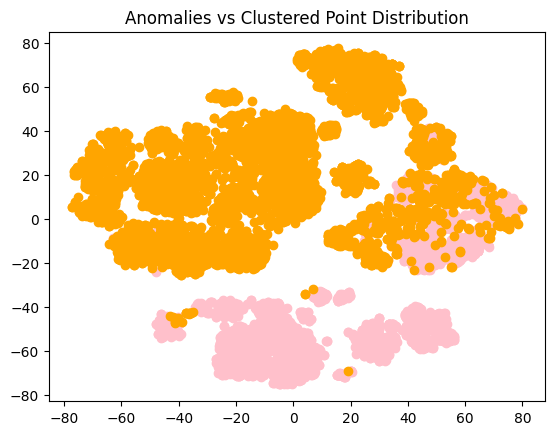

In [110]:
resultsX = []
resultsY = []
anomalyArrX = []
anomalyArrY = []
for i in range(0, len(results)):
    if (labels[i] == -1):
        anomalyArrX.append(results[i][0])
        anomalyArrY.append(results[i][1])
    else:
        resultsX.append(results[i][0])
        resultsY.append(results[i][1])
fig,ax = plt.subplots()
plt.title("Anomalies vs Clustered Point Distribution")
plt.plot(resultsX, resultsY, 'o', color="pink")
plt.plot(anomalyArrX, anomalyArrY, 'o', color="orange")
plt.savefig('Anomalies vs Clustered Point Distribution.svg', format='svg', dpi=1200)

In [136]:
"""
Part 5
We will visualize every cluster and via color and every
External variable via a different graph.
"""
size=24000
fullDf = pd.read_csv('USCensus1990.data.csv')
encoder = OneHotEncoder()
kmeanss = []
finArr0 = []
finArr1 = []
finArr2 = []
finArr3 = []
for i in range(0, 10):
    samples = fullDf.sample(size)
    sampless = copy.deepcopy(samples)
    sampless.pop('dAge')
    sampless.pop('iSex')
    sampless.pop('dHispanic')
    sampless.pop('iYearwrk')
    testDf = encoder.fit_transform(sampless).toarray()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(testDf)
    labels = kmeans.labels_
    externalsArr = ['dAge','iSex','dHispanic','iYearwrk']
    indexArr = []
    firstCluster = []
    secondCluster = []
    thirdCluster = []
    fourthCluster = []
    firstClusterLabels = []
    secondClusterLabels = []
    thirdClusterLabels = []
    fourthClusterLabels = []
    firstClusterTrueLabels = []
    secondClusterTrueLabels = []
    thirdClusterTrueLabels = []
    fourthClusterTrueLabels = []
    for i in range(0, len(labels)):
        if (labels[i] == 0):
            firstCluster.append(i)
            firstClusterLabels.append(labels[i])
            firstClusterTrueLabels.append(samples.iloc[[i]])
        elif (labels[i] == 1):
            secondCluster.append(i)
            secondClusterLabels.append(labels[i])
            secondClusterTrueLabels.append(samples.iloc[[i]])
        elif (labels[i] == 2):
            thirdCluster.append(i)
            thirdClusterLabels.append(labels[i])
            thirdClusterTrueLabels.append(samples.iloc[[i]])
        else:
            fourthCluster.append(i)
            fourthClusterLabels.append(labels[i])
            fourthClusterTrueLabels.append(samples.iloc[[i]])
    firstClusterTrueLabels = pd.concat(firstClusterTrueLabels)
    secondClusterTrueLabels = pd.concat(secondClusterTrueLabels)
    thirdClusterTrueLabels = pd.concat(thirdClusterTrueLabels)
    fourthClusterTrueLabels = pd.concat(fourthClusterTrueLabels)
    firstAssociation=[mutual_info_score(firstClusterTrueLabels['iYearwrk'].values, firstClusterLabels), mutual_info_score(firstClusterTrueLabels['dAge'].values, firstClusterLabels),mutual_info_score(firstClusterTrueLabels['iSex'].values, firstClusterLabels), mutual_info_score(firstClusterTrueLabels['dHispanic'].values, firstClusterLabels)]
    secondAssociation = [mutual_info_score(secondClusterTrueLabels['iYearwrk'].values, secondClusterLabels), mutual_info_score(secondClusterTrueLabels['dAge'].values, secondClusterLabels), mutual_info_score(secondClusterTrueLabels['iSex'].values, secondClusterLabels), mutual_info_score(secondClusterTrueLabels['dHispanic'].values, secondClusterLabels)]
    thirdAssociation = [mutual_info_score(thirdClusterTrueLabels['iYearwrk'].values, thirdClusterLabels), mutual_info_score(thirdClusterTrueLabels['dAge'].values, thirdClusterLabels), mutual_info_score(thirdClusterTrueLabels['iSex'].values, thirdClusterLabels), mutual_info_score(thirdClusterTrueLabels['dHispanic'].values, thirdClusterLabels)]
    fourthAssociation = [mutual_info_score(fourthClusterTrueLabels['iYearwrk'].values, fourthClusterLabels), mutual_info_score(fourthClusterTrueLabels['dAge'].values, fourthClusterLabels), mutual_info_score(fourthClusterTrueLabels['iSex'].values, fourthClusterLabels), mutual_info_score(fourthClusterTrueLabels['dHispanic'].values, fourthClusterLabels)]
    #print(fourthAssociation,thirdAssociation,secondAssociation,firstAssociation)
    #print(len(firstCluster), len(secondCluster), len(thirdCluster), len(fourthCluster))
    finArr0.append(firstAssociation)
    finArr1.append(secondAssociation)
    finArr2.append(thirdAssociation)
    finArr3.append(fourthAssociation)
finArr0 = np.array(finArr0)
finArr1 = np.array(finArr1)
finArr2 = np.array(finArr2)
finArr3 = np.array(finArr3)
print(finArr0.sum(axis=0)/len(finArr0), finArr1.sum(axis=0)/len(finArr1), finArr2.sum(axis=0)/len(finArr2), finArr3.sum(axis=0)/len(finArr3))

[2.44097277e-16 1.38777878e-16 2.99760217e-16 1.70696790e-16] [0.00000000e+00 2.10942375e-16 2.55351296e-16 1.72778458e-16] [0.00000000e+00 0.00000000e+00 1.88737914e-16 1.70696790e-16] [1.77483896e-16 0.00000000e+00 1.11022302e-16 3.44863027e-16]


In [137]:
"""
Fourth cluster = fourth external
First cluster = first external
Second cluster = second external + third External

"""

'\nFourth cluster = fourth external\nFirst cluster = first external\nSecond cluster = second external + third External\n\n'

In [138]:
firstAssociation=[mutual_info_score(firstClusterTrueLabels['iYearwrk'].values, firstClusterLabels), mutual_info_score(firstClusterTrueLabels['dAge'].values, firstClusterLabels),mutual_info_score(firstClusterTrueLabels['iSex'].values, firstClusterLabels), mutual_info_score(firstClusterTrueLabels['dHispanic'].values, firstClusterLabels)]
secondAssociation = [mutual_info_score(secondClusterTrueLabels['iYearwrk'].values, secondClusterLabels), mutual_info_score(secondClusterTrueLabels['dAge'].values, secondClusterLabels), mutual_info_score(secondClusterTrueLabels['iSex'].values, secondClusterLabels), mutual_info_score(secondClusterTrueLabels['dHispanic'].values, secondClusterLabels)]
thirdAssociation = [mutual_info_score(thirdClusterTrueLabels['iYearwrk'].values, thirdClusterLabels), mutual_info_score(thirdClusterTrueLabels['dAge'].values, thirdClusterLabels), mutual_info_score(thirdClusterTrueLabels['iSex'].values, thirdClusterLabels), mutual_info_score(thirdClusterTrueLabels['dHispanic'].values, thirdClusterLabels)]
fourthAssociation = [mutual_info_score(fourthClusterTrueLabels['iYearwrk'].values, fourthClusterLabels), mutual_info_score(fourthClusterTrueLabels['dAge'].values, fourthClusterLabels), mutual_info_score(fourthClusterTrueLabels['iSex'].values, fourthClusterLabels), mutual_info_score(fourthClusterTrueLabels['dHispanic'].values, fourthClusterLabels)]
print(fourthAssociation,thirdAssociation,secondAssociation,firstAssociation)
"""
We got only two very week association. Fourth cluster with iSex and first cluster with iYearwrk. Visualizing!
"""

[0.0, 0.0, 1.1102230246251565e-16, 1.7243151351209463e-15] [0.0, 0.0, 0.0, 8.534839501805891e-16] [0.0, 3.885780586188048e-16, 9.43689570931383e-16, 8.638922910364499e-16] [0.0, 0.0, 0.0, 0.0]


'\nWe got only two very week association. Fourth cluster with iSex and first cluster with iYearwrk. Visualizing!\n'

In [139]:
from sklearn.manifold import TSNE
#print(testDf)
tsne = TSNE(n_components=2, perplexity=30)
results = tsne.fit_transform(testDf)

c:\users\ron zamir\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ron zamir\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


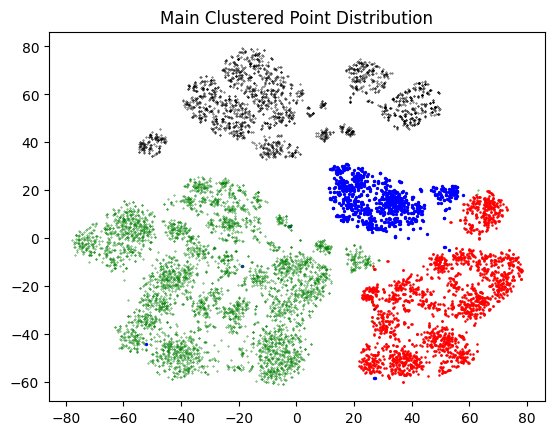

In [146]:
fig,ax = plt.subplots()
plt.title("Main Clustered Point Distribution")
xArr = []
yArr = []
for i in firstCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="blue", s=2)
xArr = []
yArr = []
for i in secondCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="red", s=0.7)
xArr = []
yArr = []
for i in thirdCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="black", s=0.1)
xArr = []
yArr = []
for i in fourthCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="green", s=0.1)
plt.savefig('Main Clustered Point Distribution.svg', format='svg', dpi=1200)

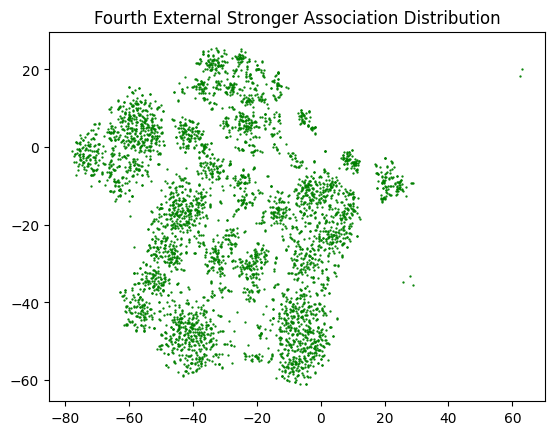

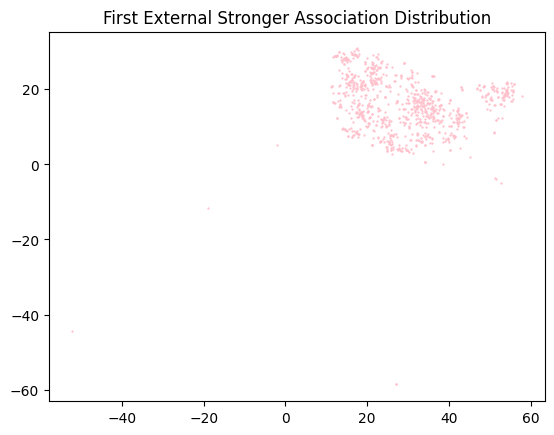

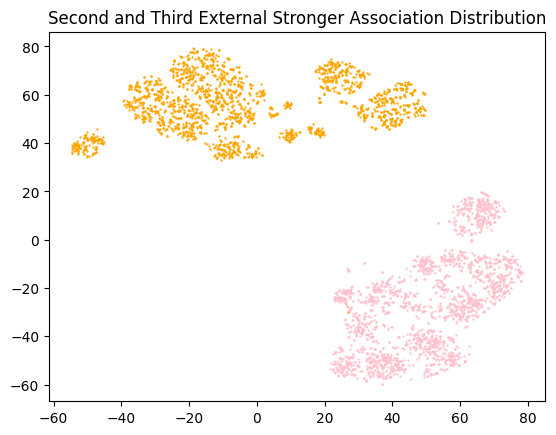

In [152]:
fig,ax = plt.subplots()
plt.title("Fourth External Stronger Association Distribution")
xArr = []
yArr = []
for i in fourthCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="green", s=0.4)
plt.savefig('Fourth External Stronger Association Distribution.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
plt.title("First External Stronger Association Distribution")
xArr = []
yArr = []
for i in firstCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="pink", s=0.4)
plt.savefig('First External Stronger Association Distribution.svg', format='svg', dpi=1200)
fig,ax = plt.subplots()
plt.title("Second and Third External Stronger Association Distribution")
xArr = []
yArr = []
for i in secondCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="pink", s=0.4)
xArr = []
yArr = []
for i in thirdCluster:
    xArr.append(results[i][0])
    yArr.append(results[i][1])
plt.scatter(xArr, yArr, color="orange", s=0.4)
plt.savefig('Second and Third External Stronger Association Distribution.svg', format='svg', dpi=1200)